In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *
import datetime as dt
from simulation_func import *
import pandas as pd
import pickle as pkl
import os
import seaborn as sns

# Loading Data

- Load data from `Data` 

In [3]:
base_dir = '..\Data'
sample_number = 1
type = '\scale_+1'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\Abl_{sample_number}'

In [4]:
base_dir = '..\Data'
sample_number = 4
type = '\sub_abl_beta=0.75'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\sAbl_{sample_number}'

In [5]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))

# Visualise population trajectories

- Starts with absolute biomass
- Then Abundance

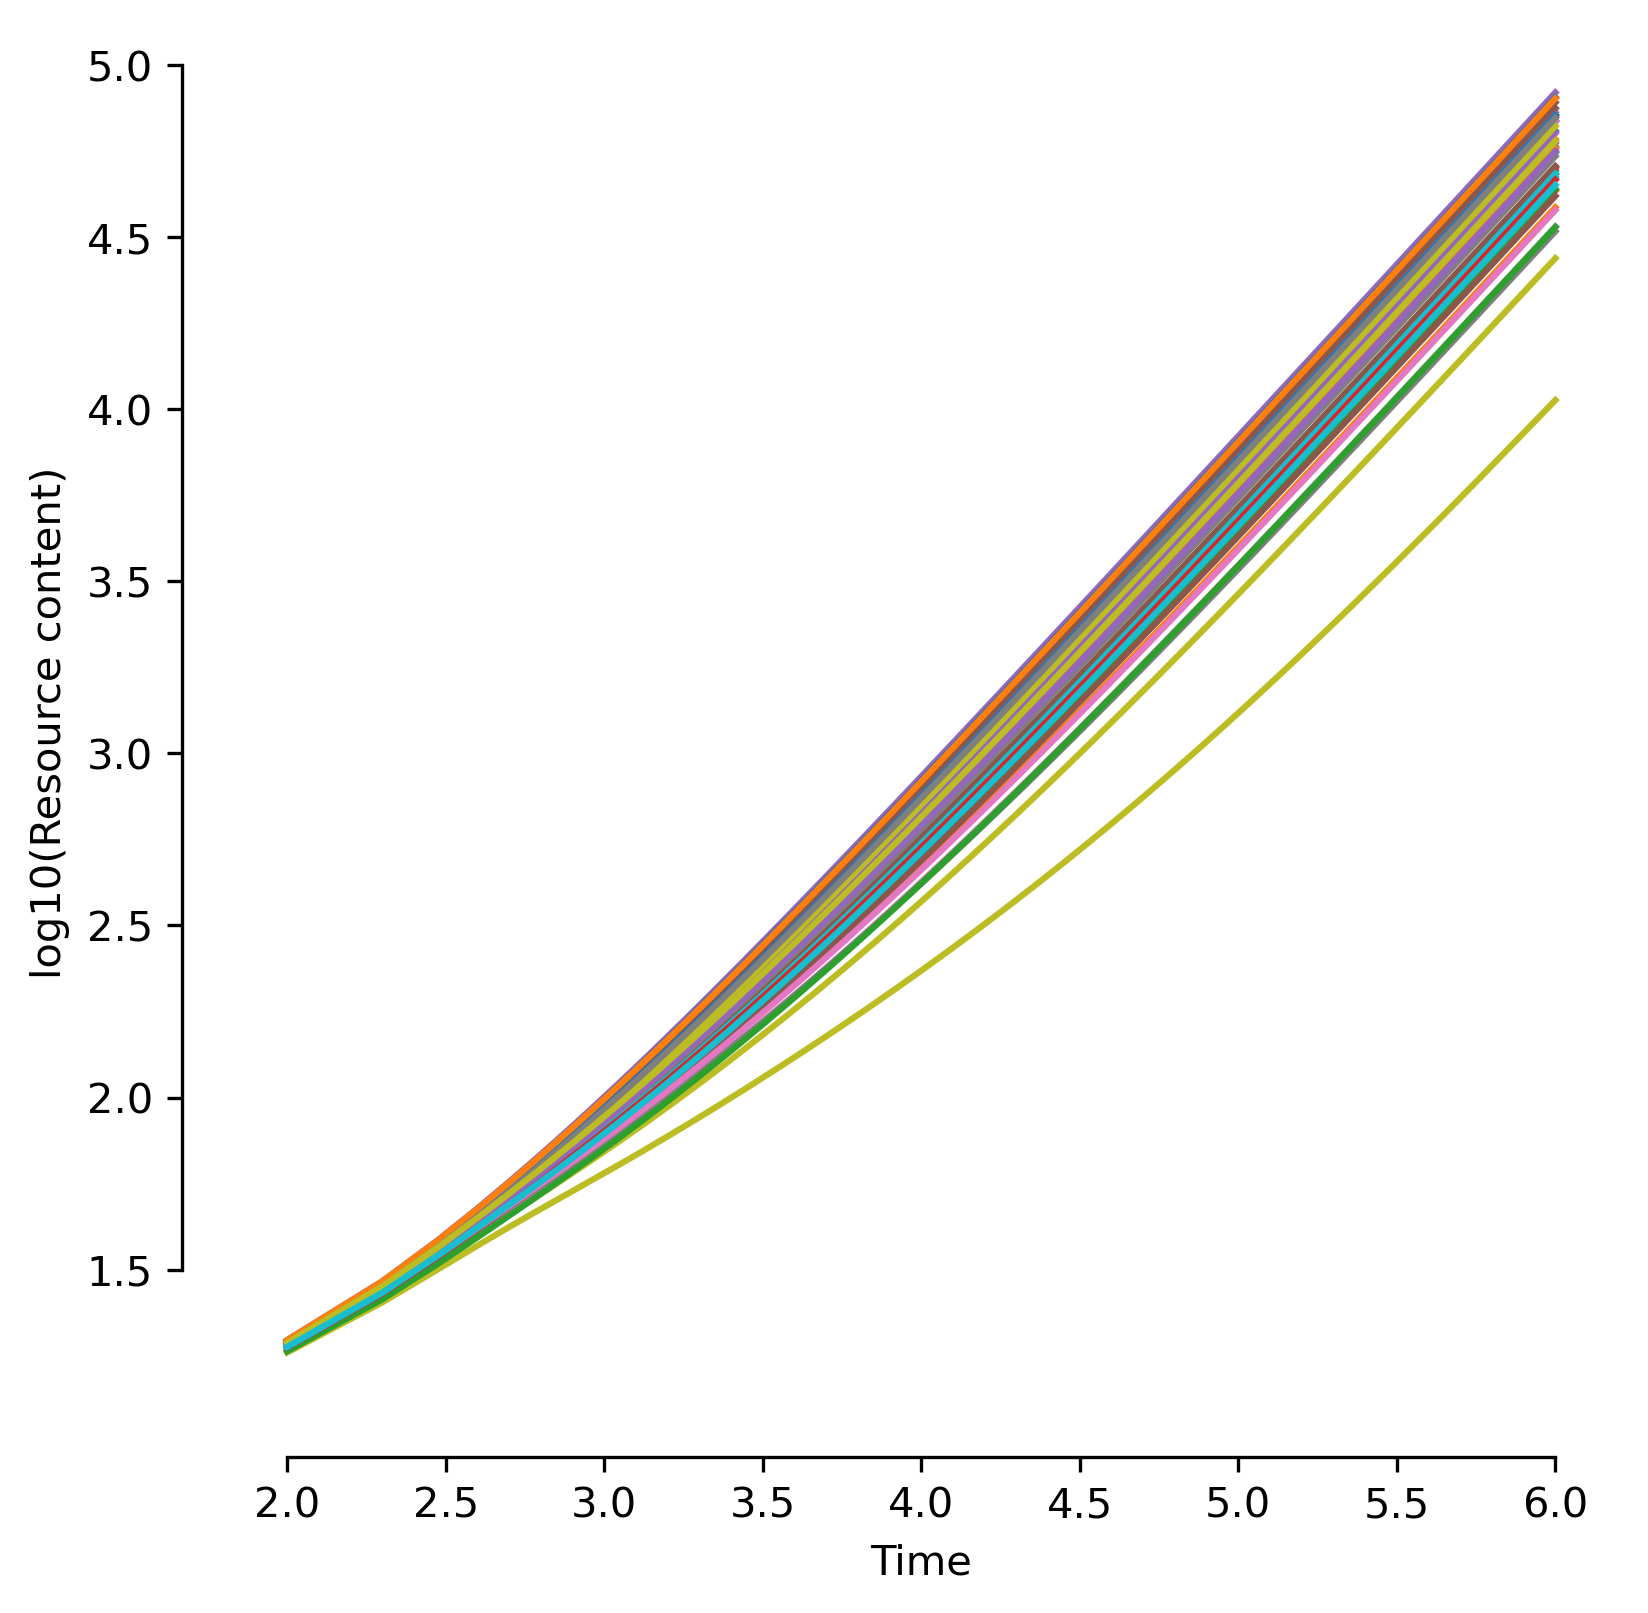

In [6]:
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('log10(Resource content)')
sns.despine(offset=10, trim=True)

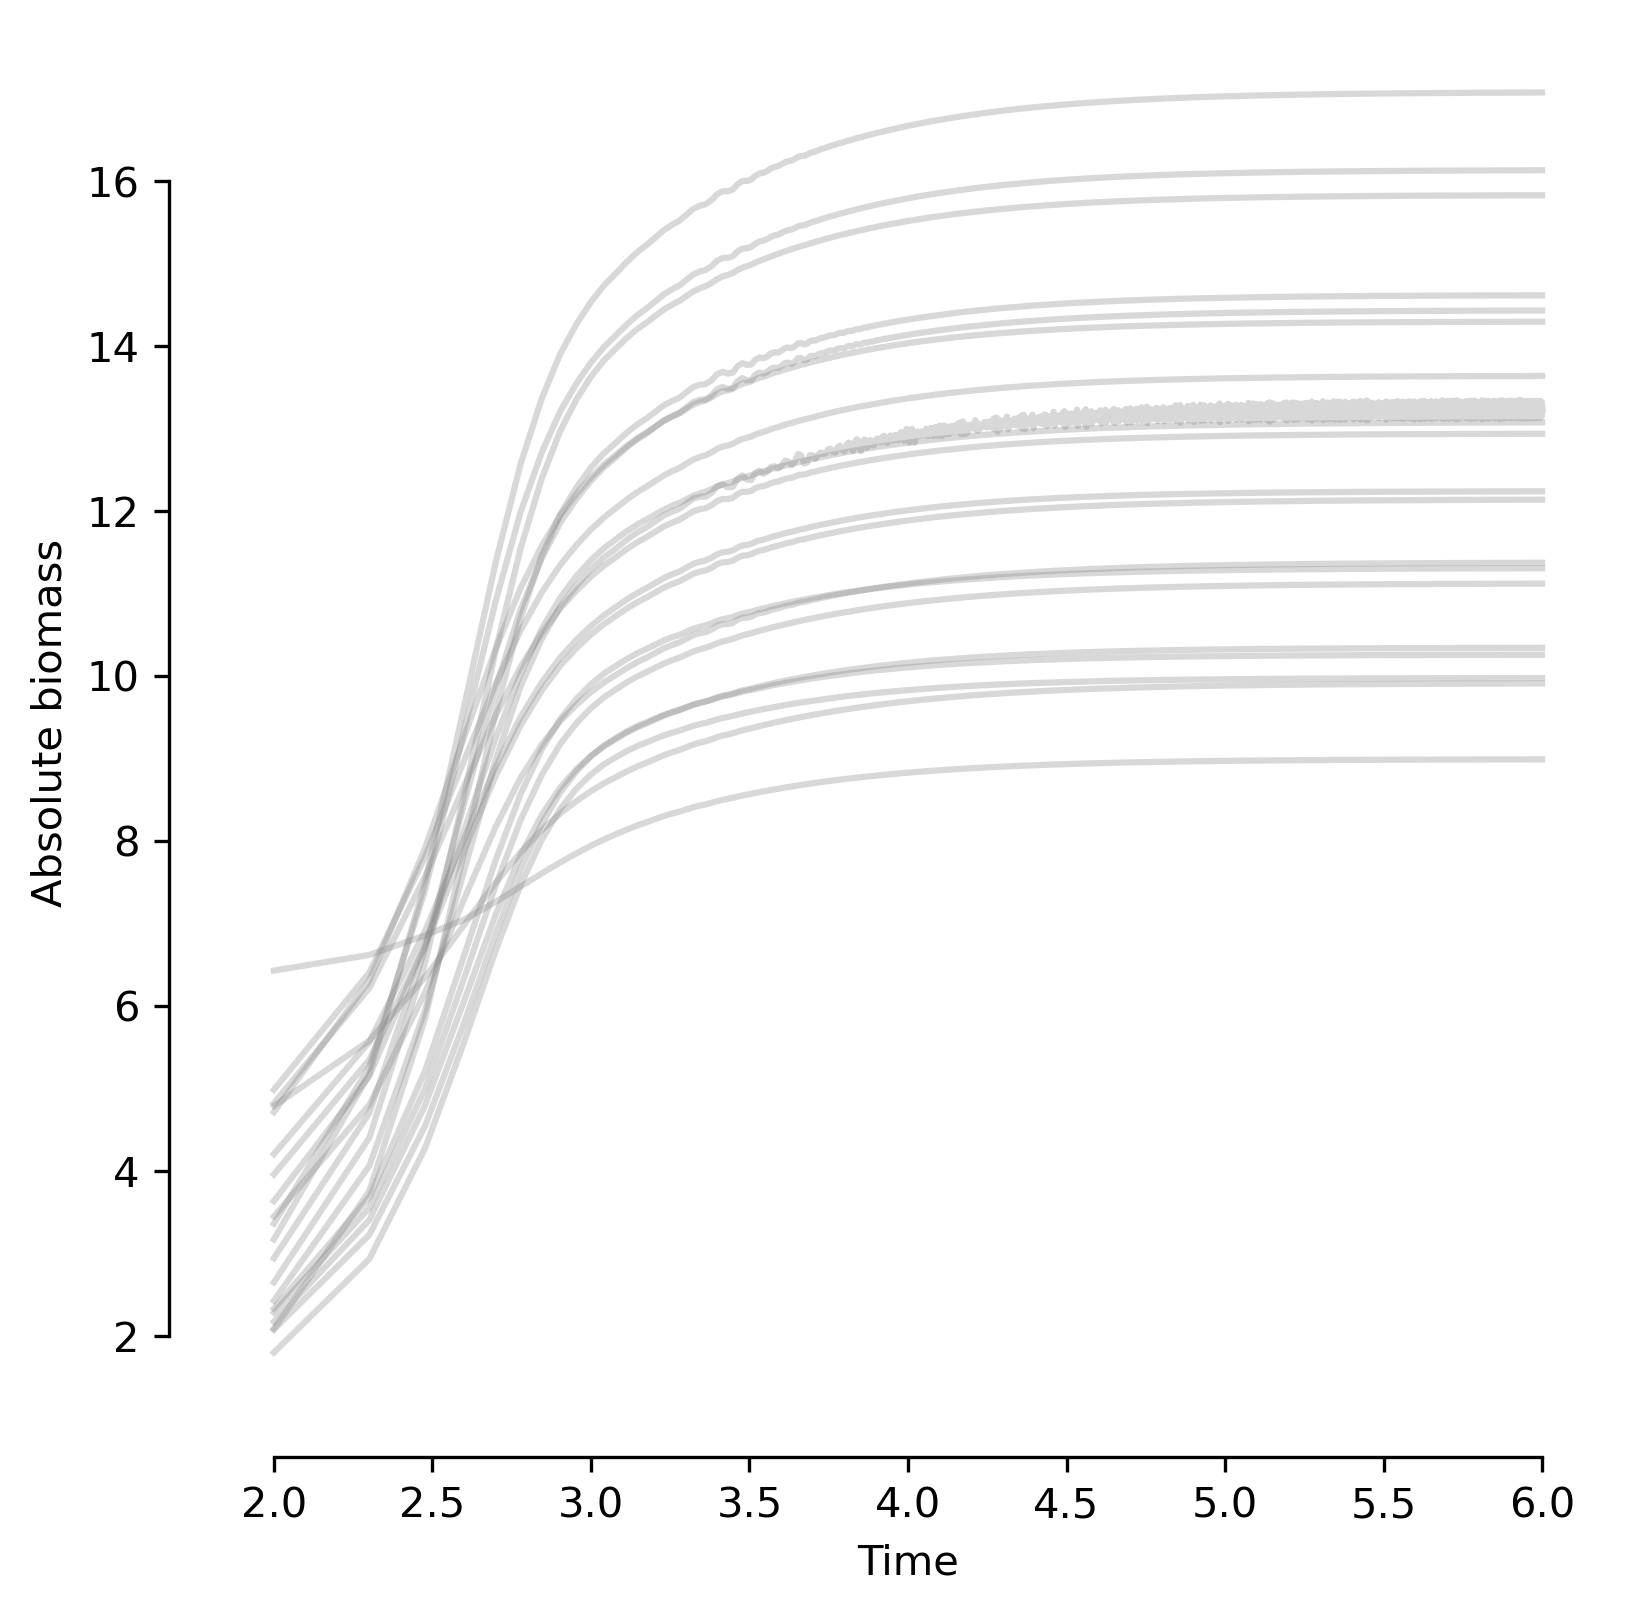

In [7]:
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=repr_Ct[i, :], color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Absolute biomass')
sns.despine(offset=10, trim=True)

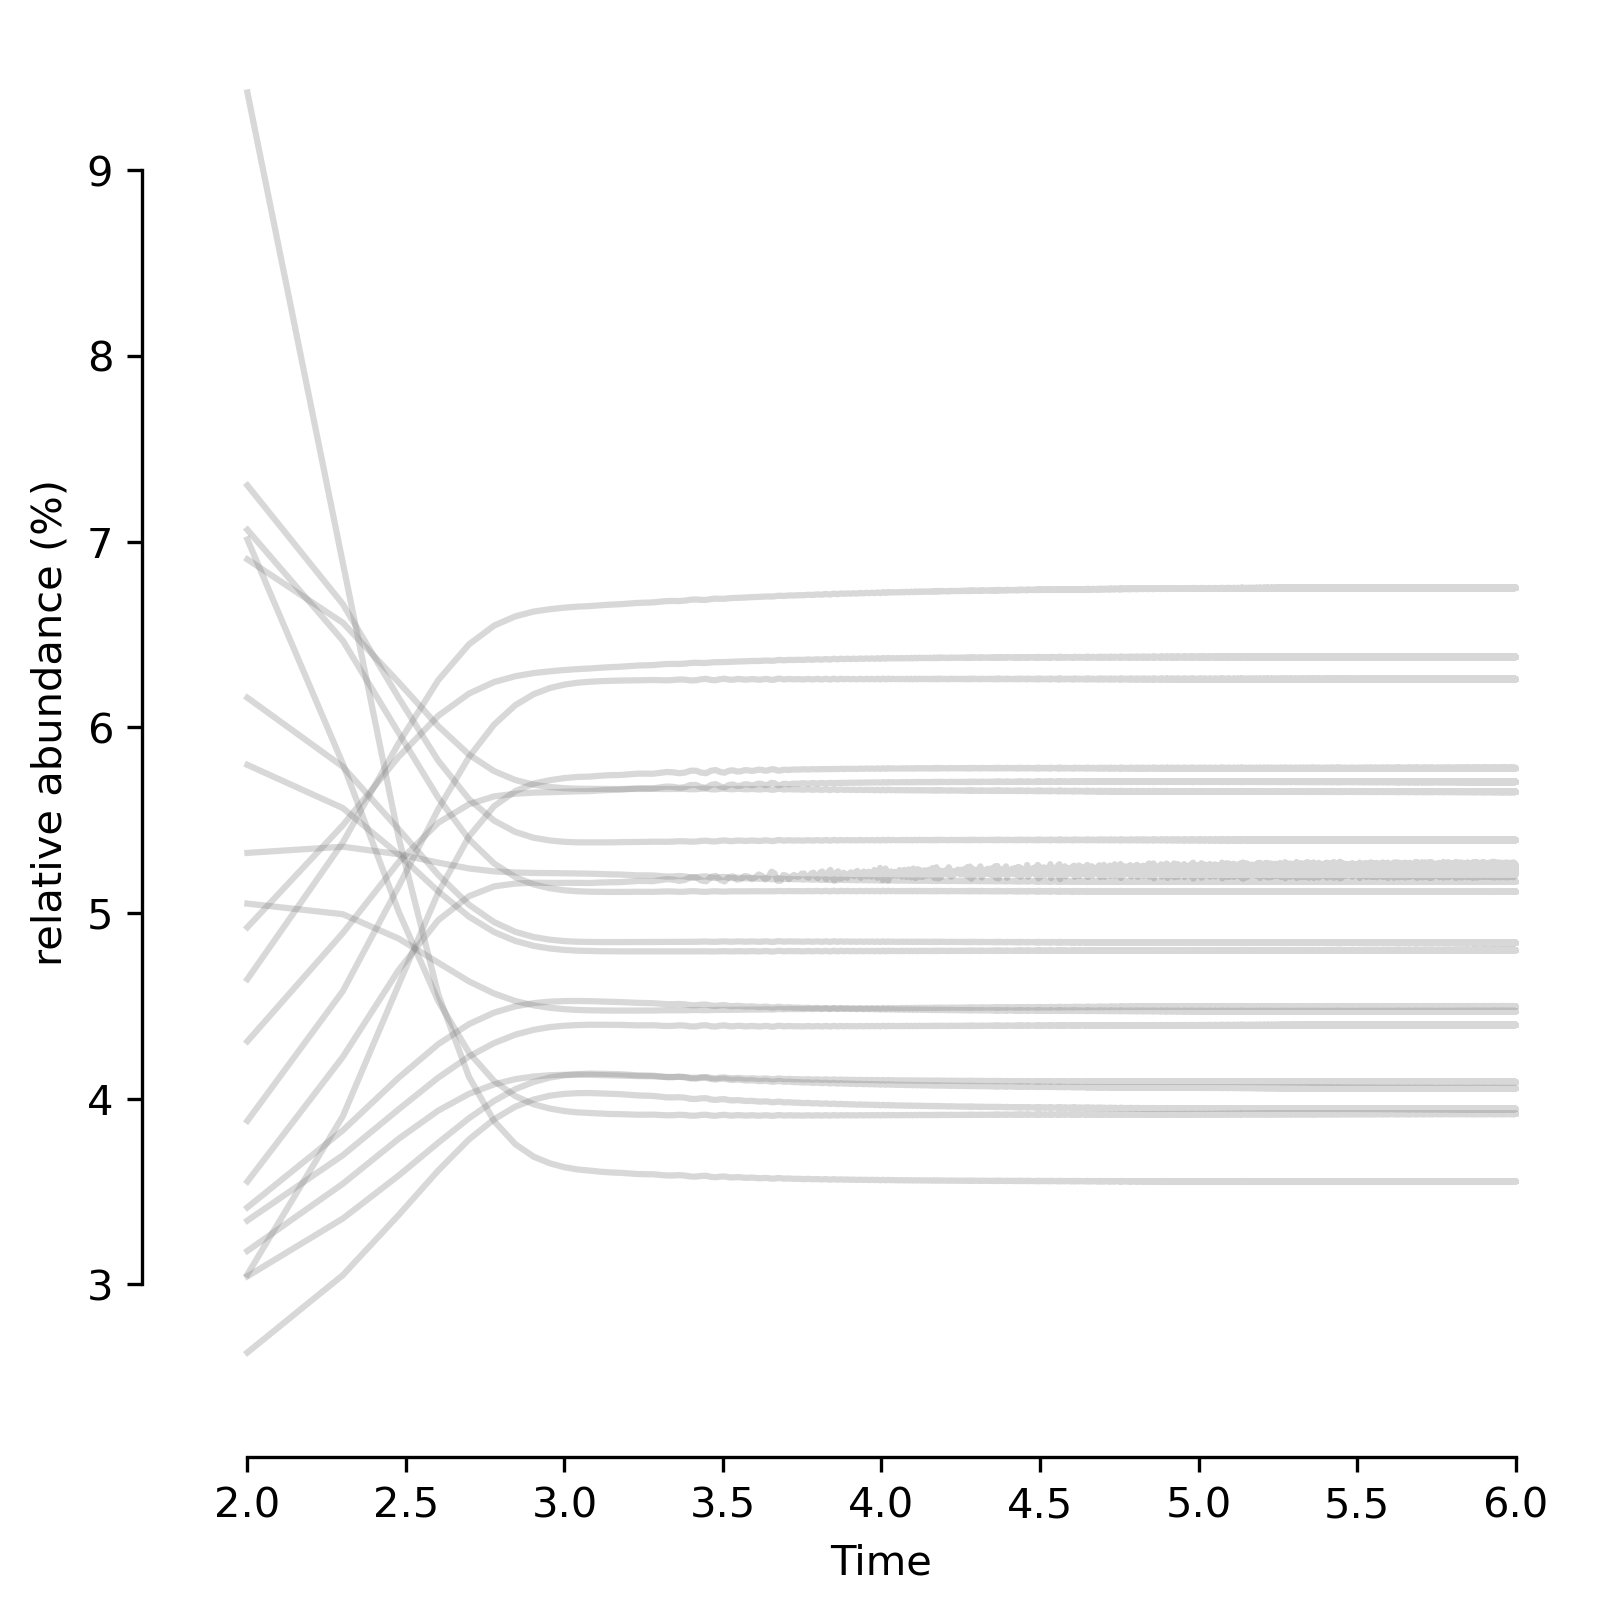

In [8]:
# plot species abudance trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100,color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('relative abundance (%)')
sns.despine(offset=10, trim=True)

In [9]:
repr_Ct.shape

(20, 10000)

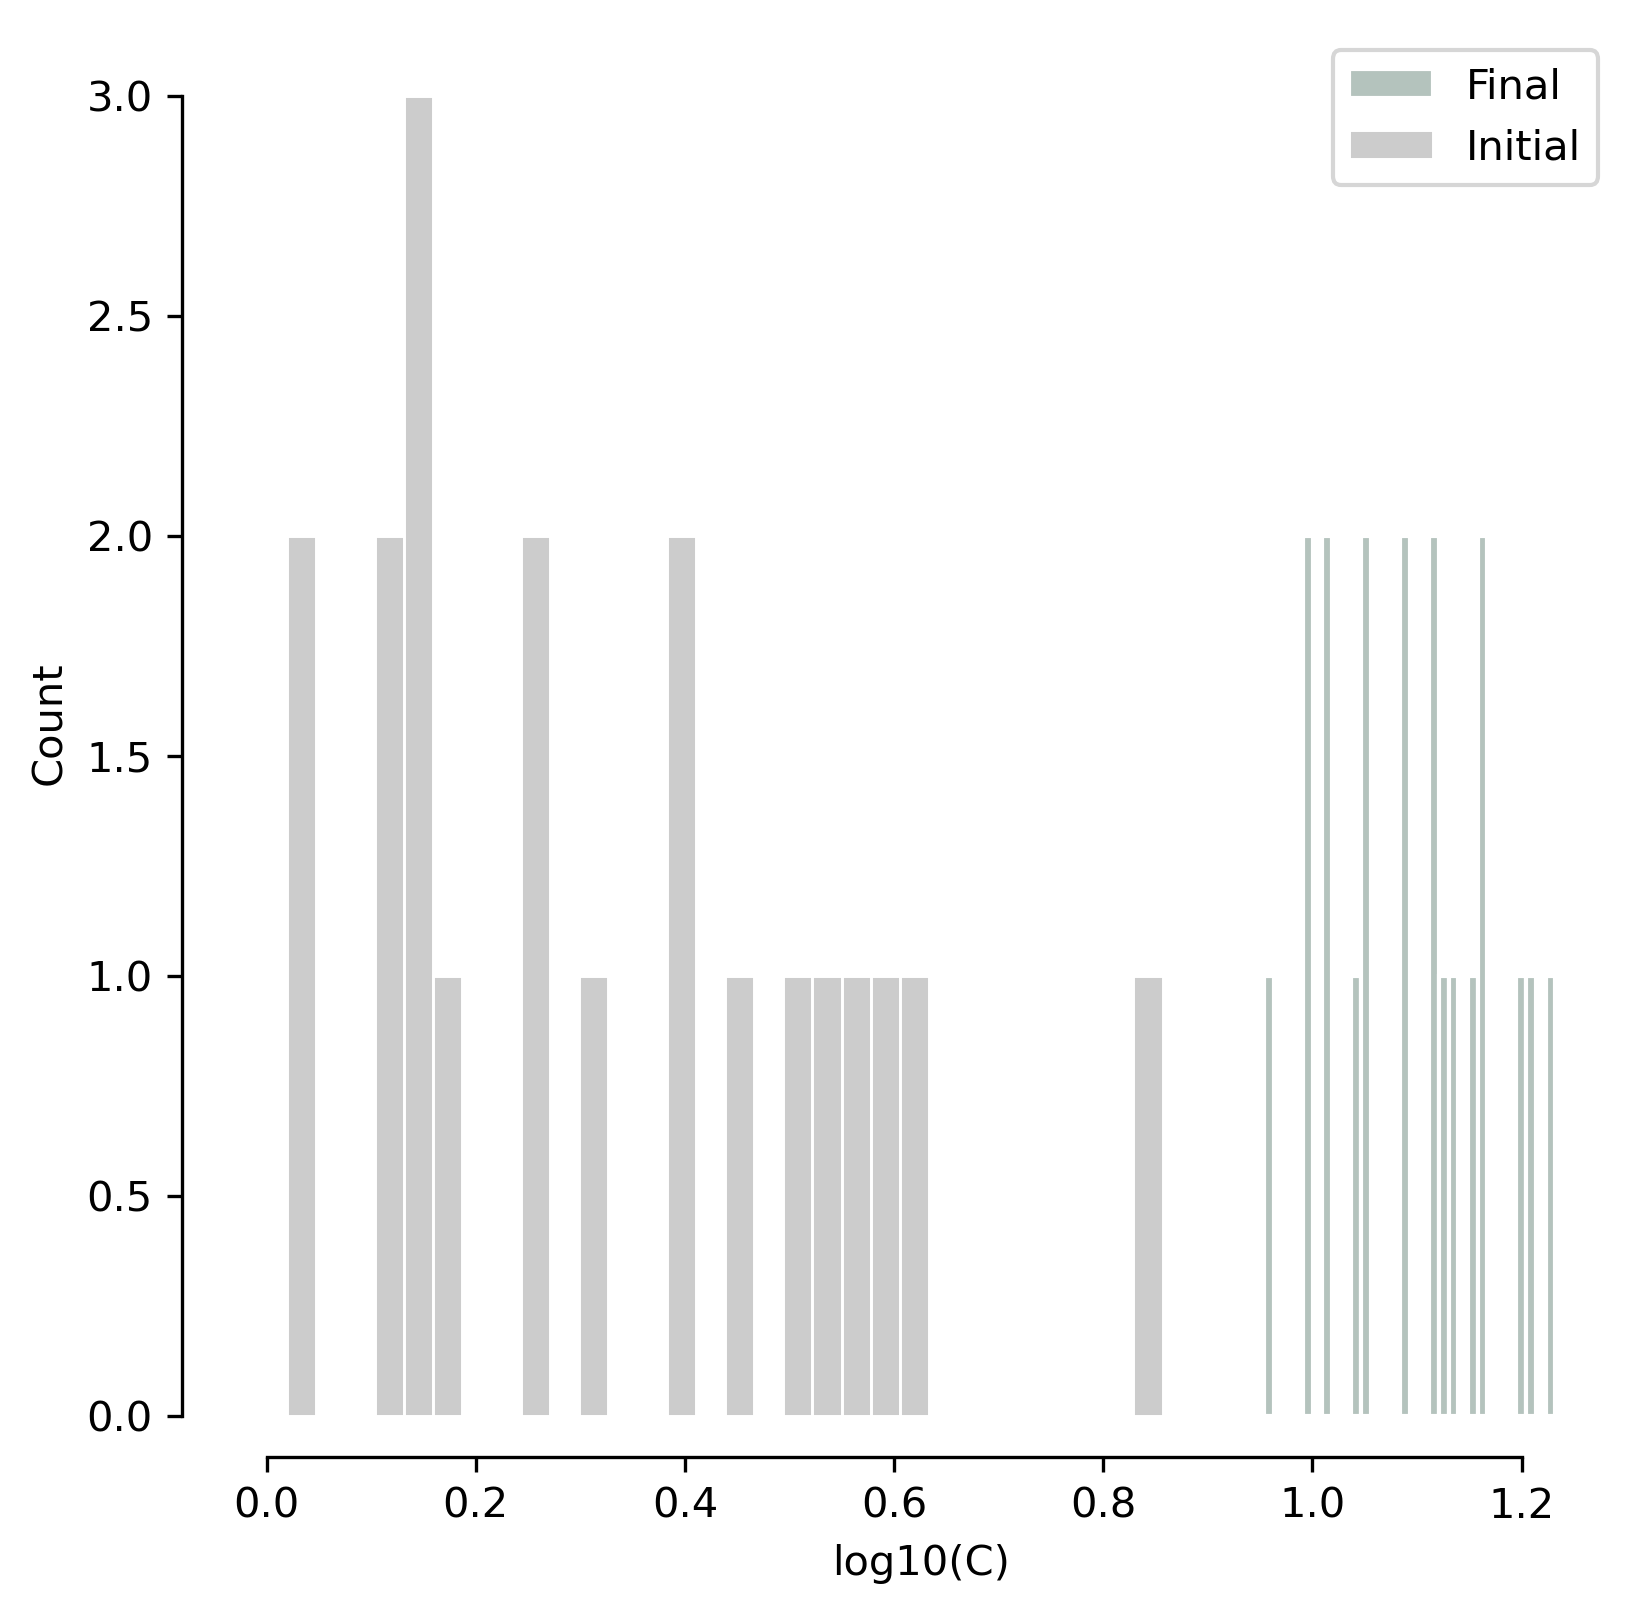

In [10]:
# Species abundance distirbution (SAD) 
# quantify the variation of abundance across species in a community

plt.figure(figsize=(6, 6), dpi=300)
sns.histplot(
    np.log10(repr_Ct[:, -1]), label='Final', color='#456B5C', 
    bins=30, alpha=0.4,
    edgecolor='white')
sns.histplot(np.log10(repr_Ct[:, 0]), label='Initial', color='grey', 
             bins=30, alpha=0.4,
             edgecolor='white')
plt.legend()
plt.xlabel('log10(C)')
sns.despine(offset=10, trim=True)

# Abundance fluctuation distribution AFD and mean abundance distirbution

- Load assembly data
- store in a list `Ct_abl` where each element is a `np.array`

In [11]:
base_dir = '..\Data'
sample_number = 1
type = '\sub_abl_beta=0.75'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
# file_name = f'\sAbl_{sample_number}'

In [12]:
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))
Ct_abl = np.empty((para.N, 30))
# load data
for i in range(1, 31):
    # define file path
    file_name = f'\sAbl_{i}' 
    Ct_abl[:, i-1] = np.load(base_dir + type + file_name + file_name + Ct_type)[:, -1]

- Next we plot AFD for each species
- first, reorganised data into `pd.Dataframe`
- then use `facetgrid` to visualised

In [13]:
vals = Ct_abl.flatten()
speclist = np.array([[f'species {i}']*30 for i in range(1, 21)]).flatten()
tardf = pd.DataFrame({'Biomass': vals, 'Species': speclist})
tardf['Biomass'] = np.log10(tardf['Biomass'])

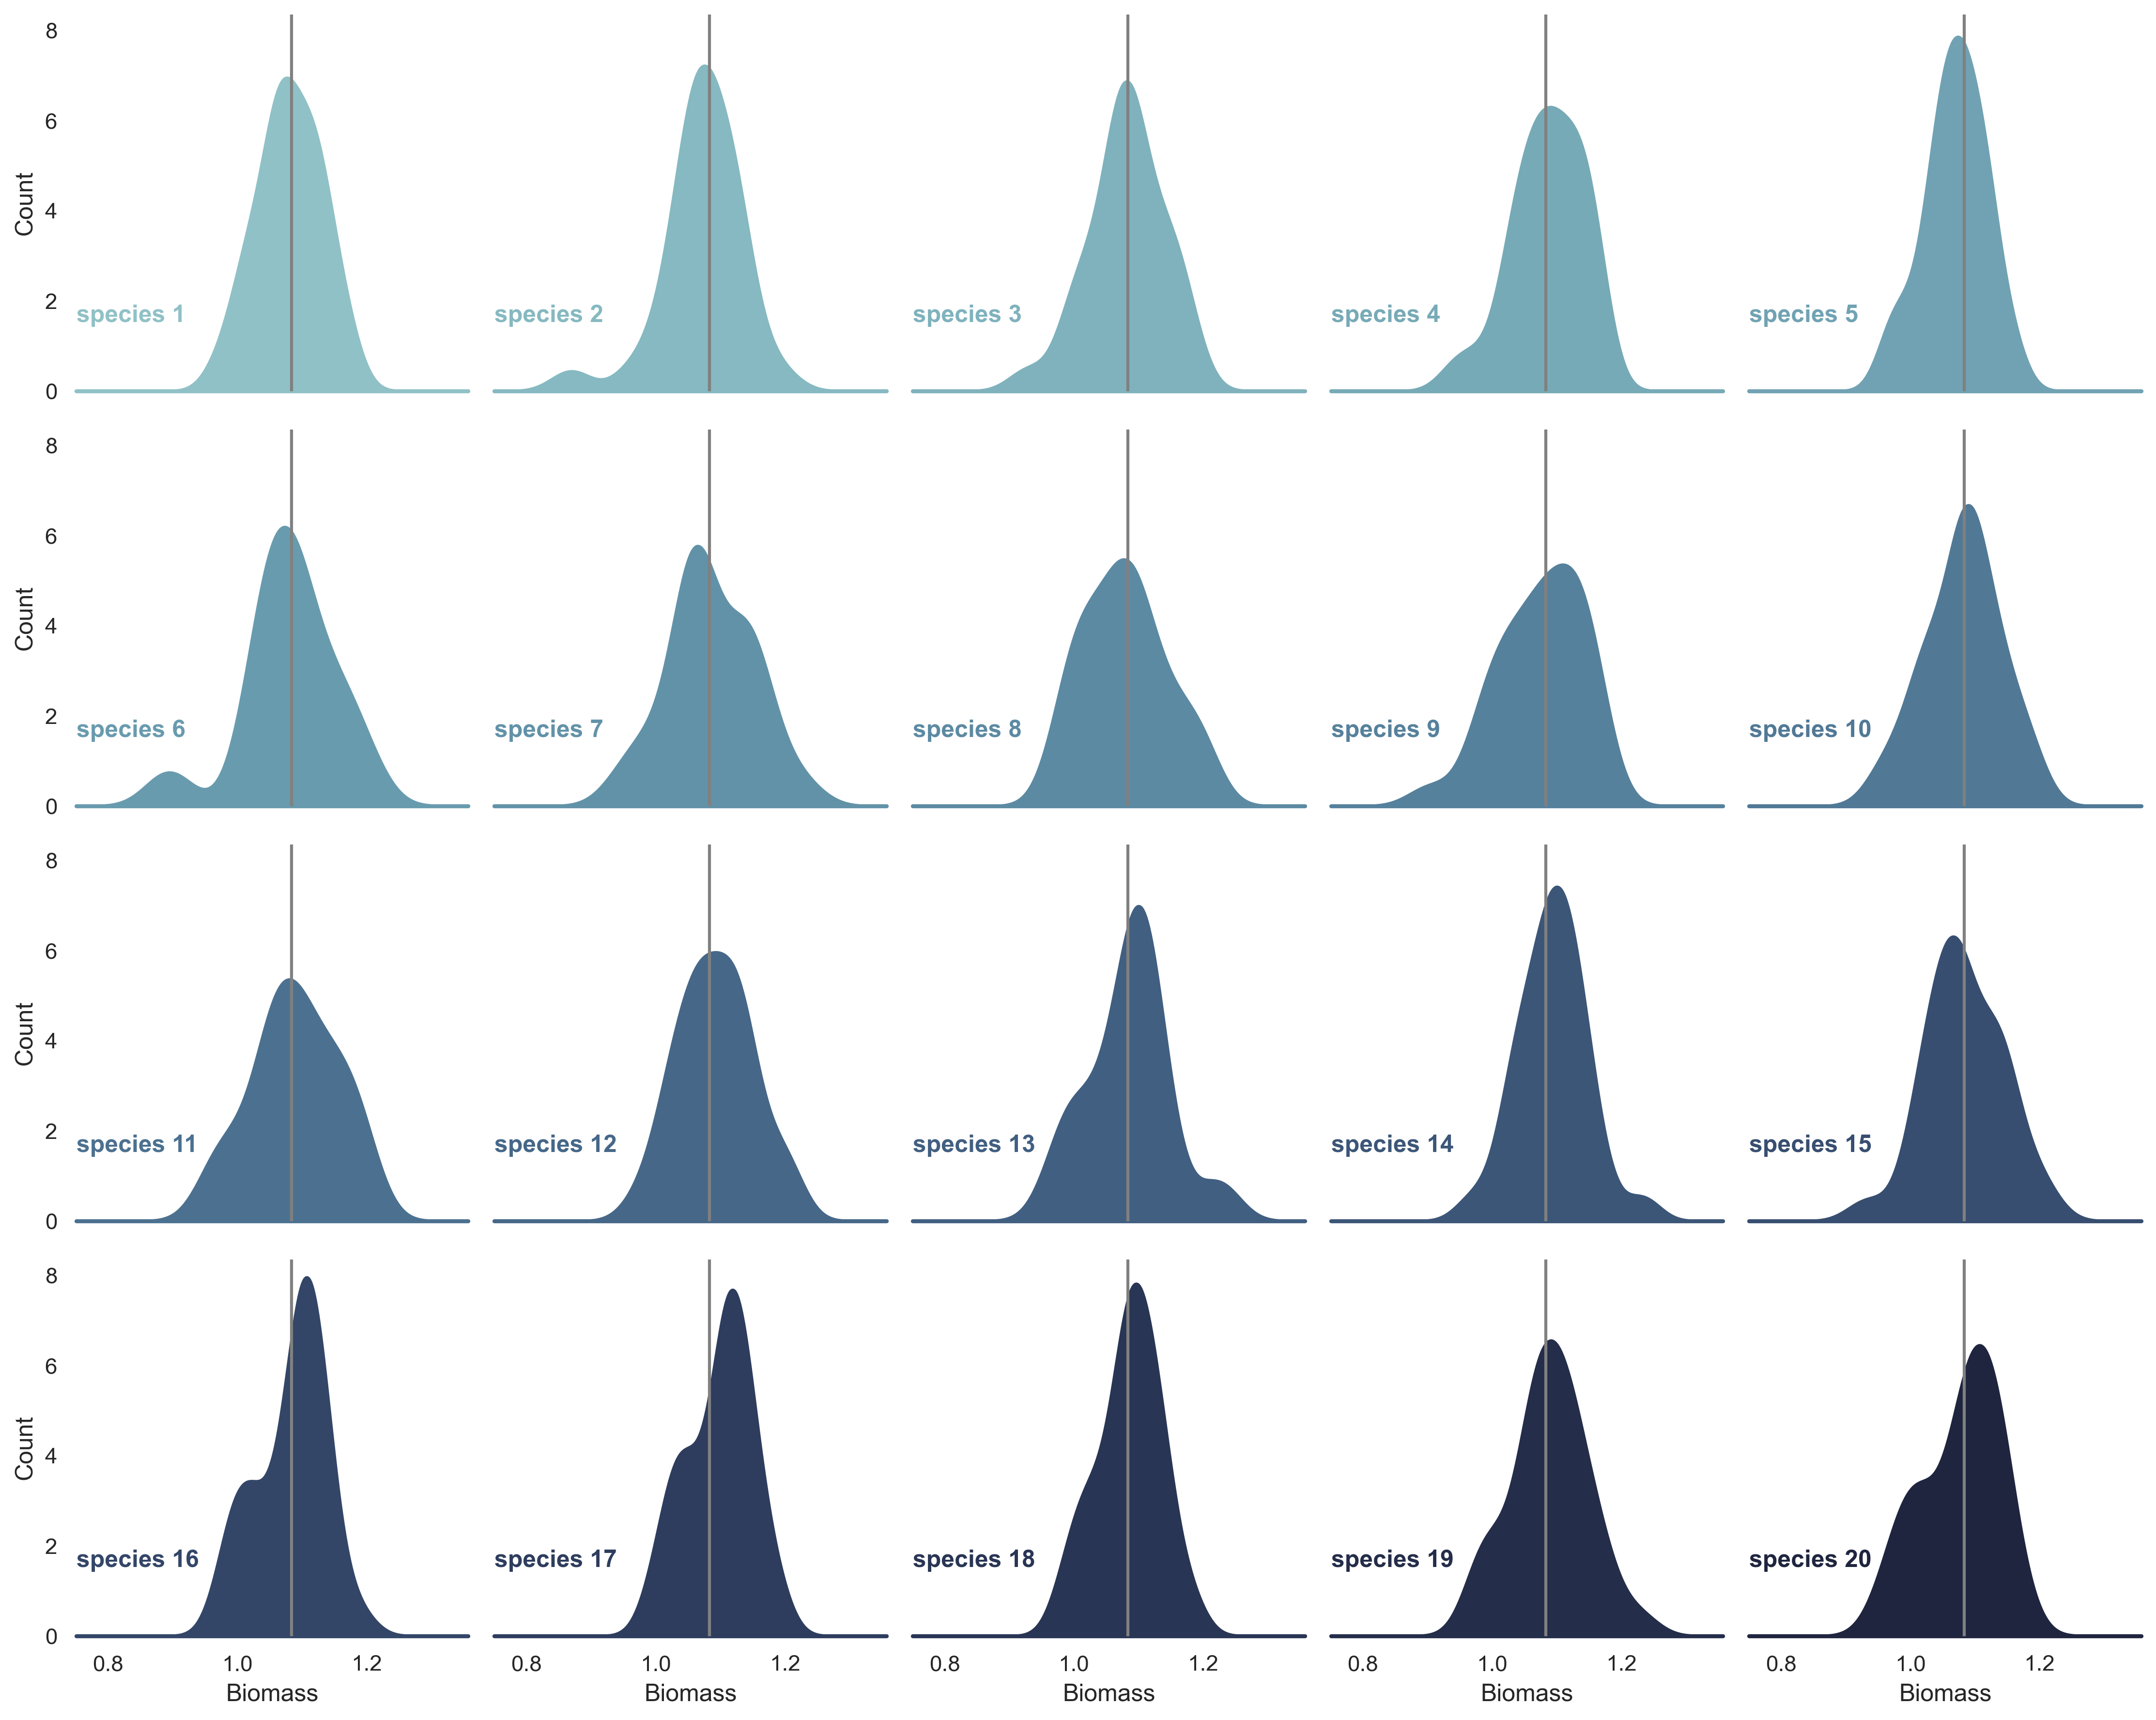

In [42]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(6, 6), 'figure.dpi':300})
pal = sns.cubehelix_palette(20, rot=-.25, light=.7)
g = sns.FacetGrid(tardf, col='Species', col_wrap=5, hue='Species', palette=pal, sharex=True, sharey=True)
g.map(sns.kdeplot, "Biomass",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
g.refline(x=tardf['Biomass'].mean(), linestyle='-', color='grey')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Biomass")
g.set_titles("")
g.set(ylabel="Count")
g.despine(bottom=True, left=True)
g.tight_layout()

# Loading $\beta$ = -0.25

In [17]:
base_dir = '..\Data'
sample_number = 1
type = '\-25_beta'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\Abl_{sample_number}'

In [18]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))

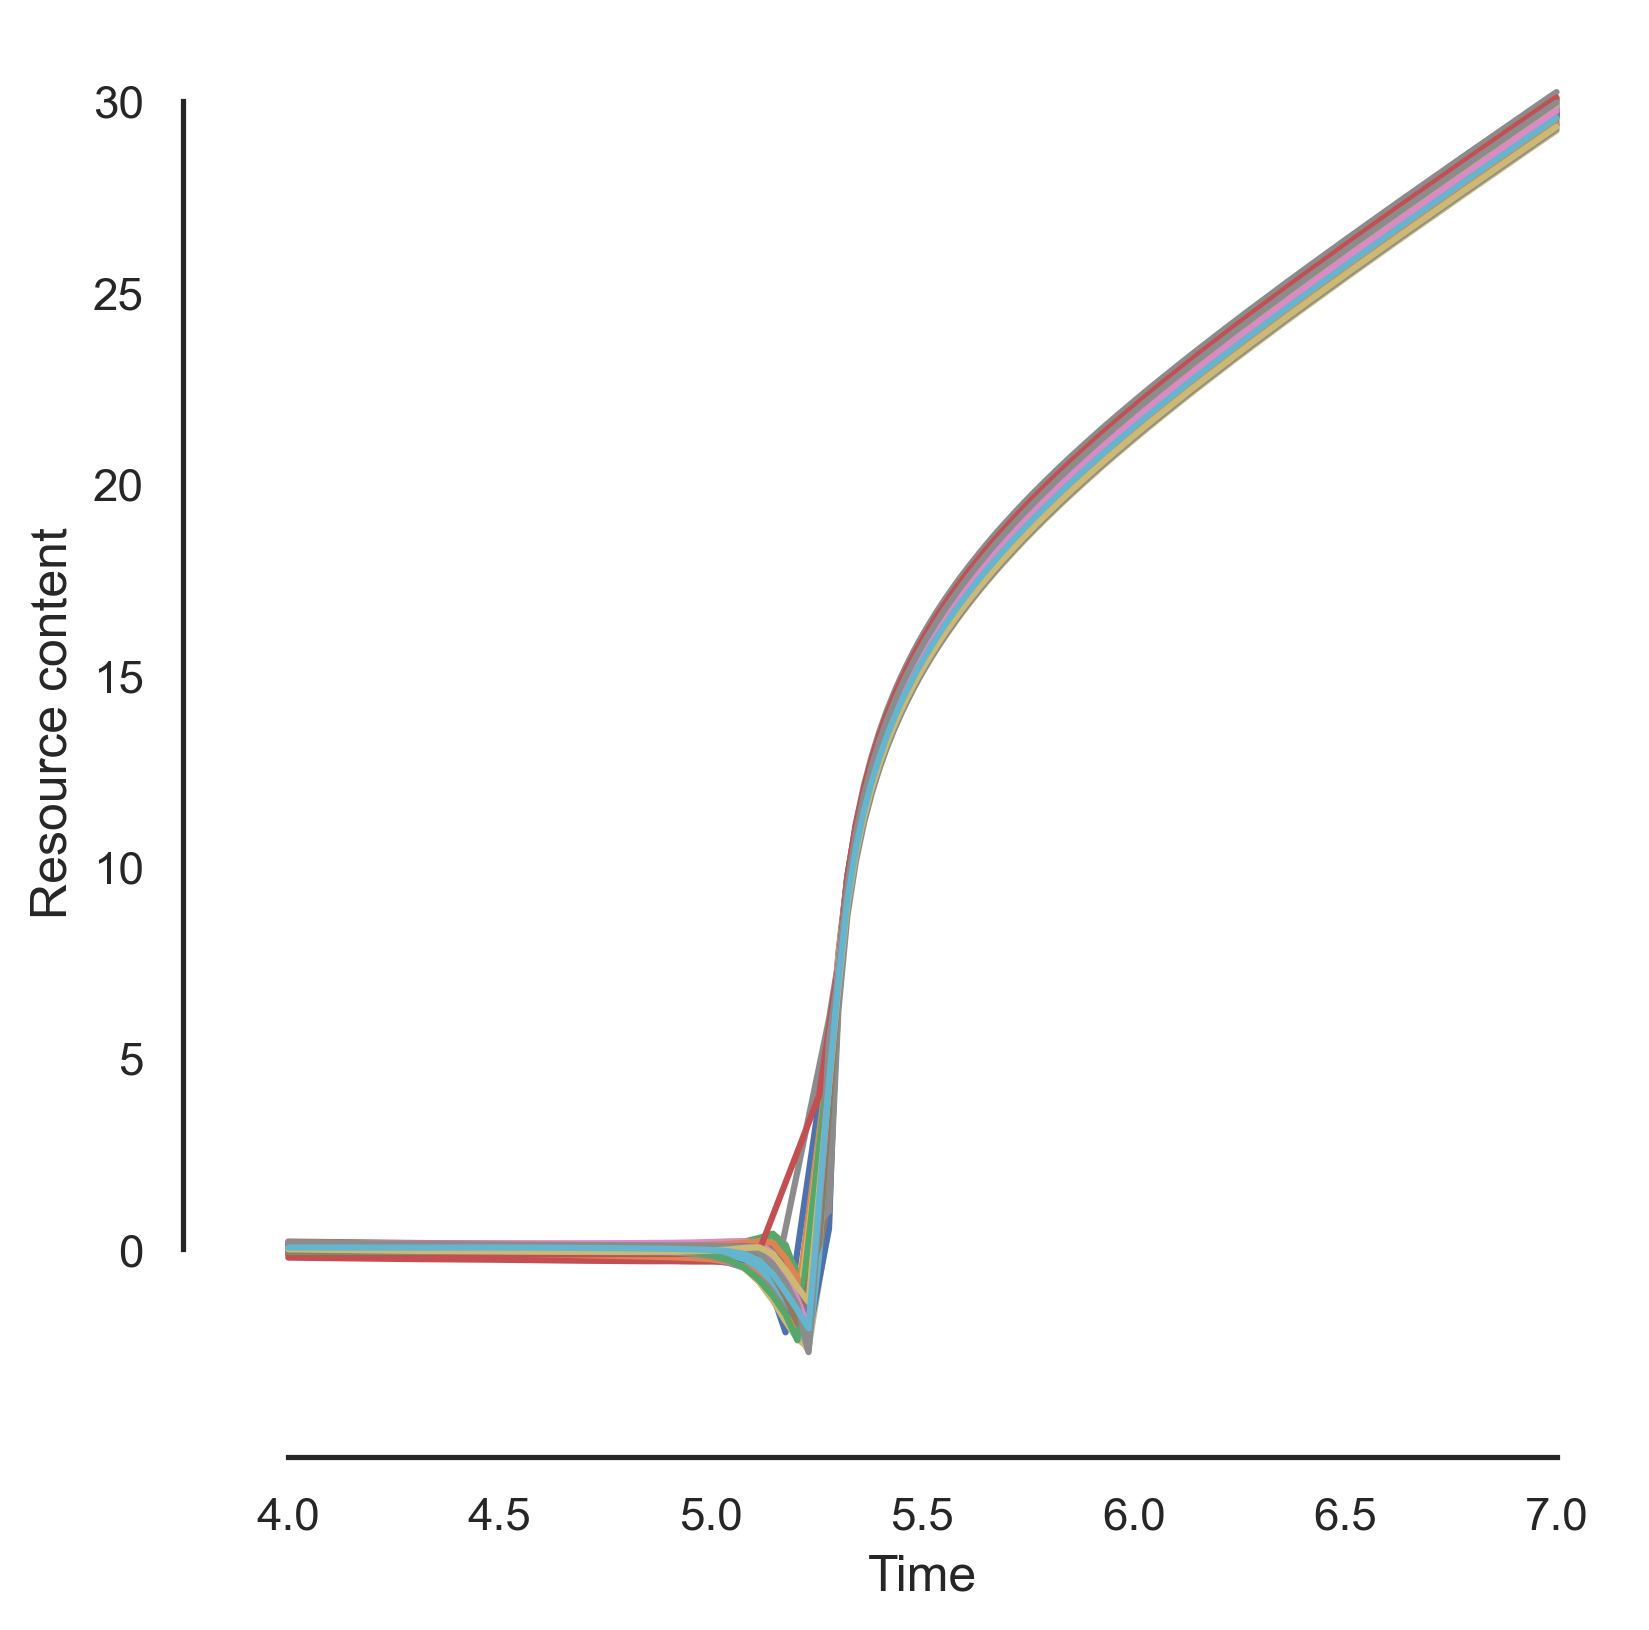

In [19]:
np.seterr(divide = 'ignore', invalid='ignore')

plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y= np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('Resource content')
sns.despine(offset=10, trim=True)

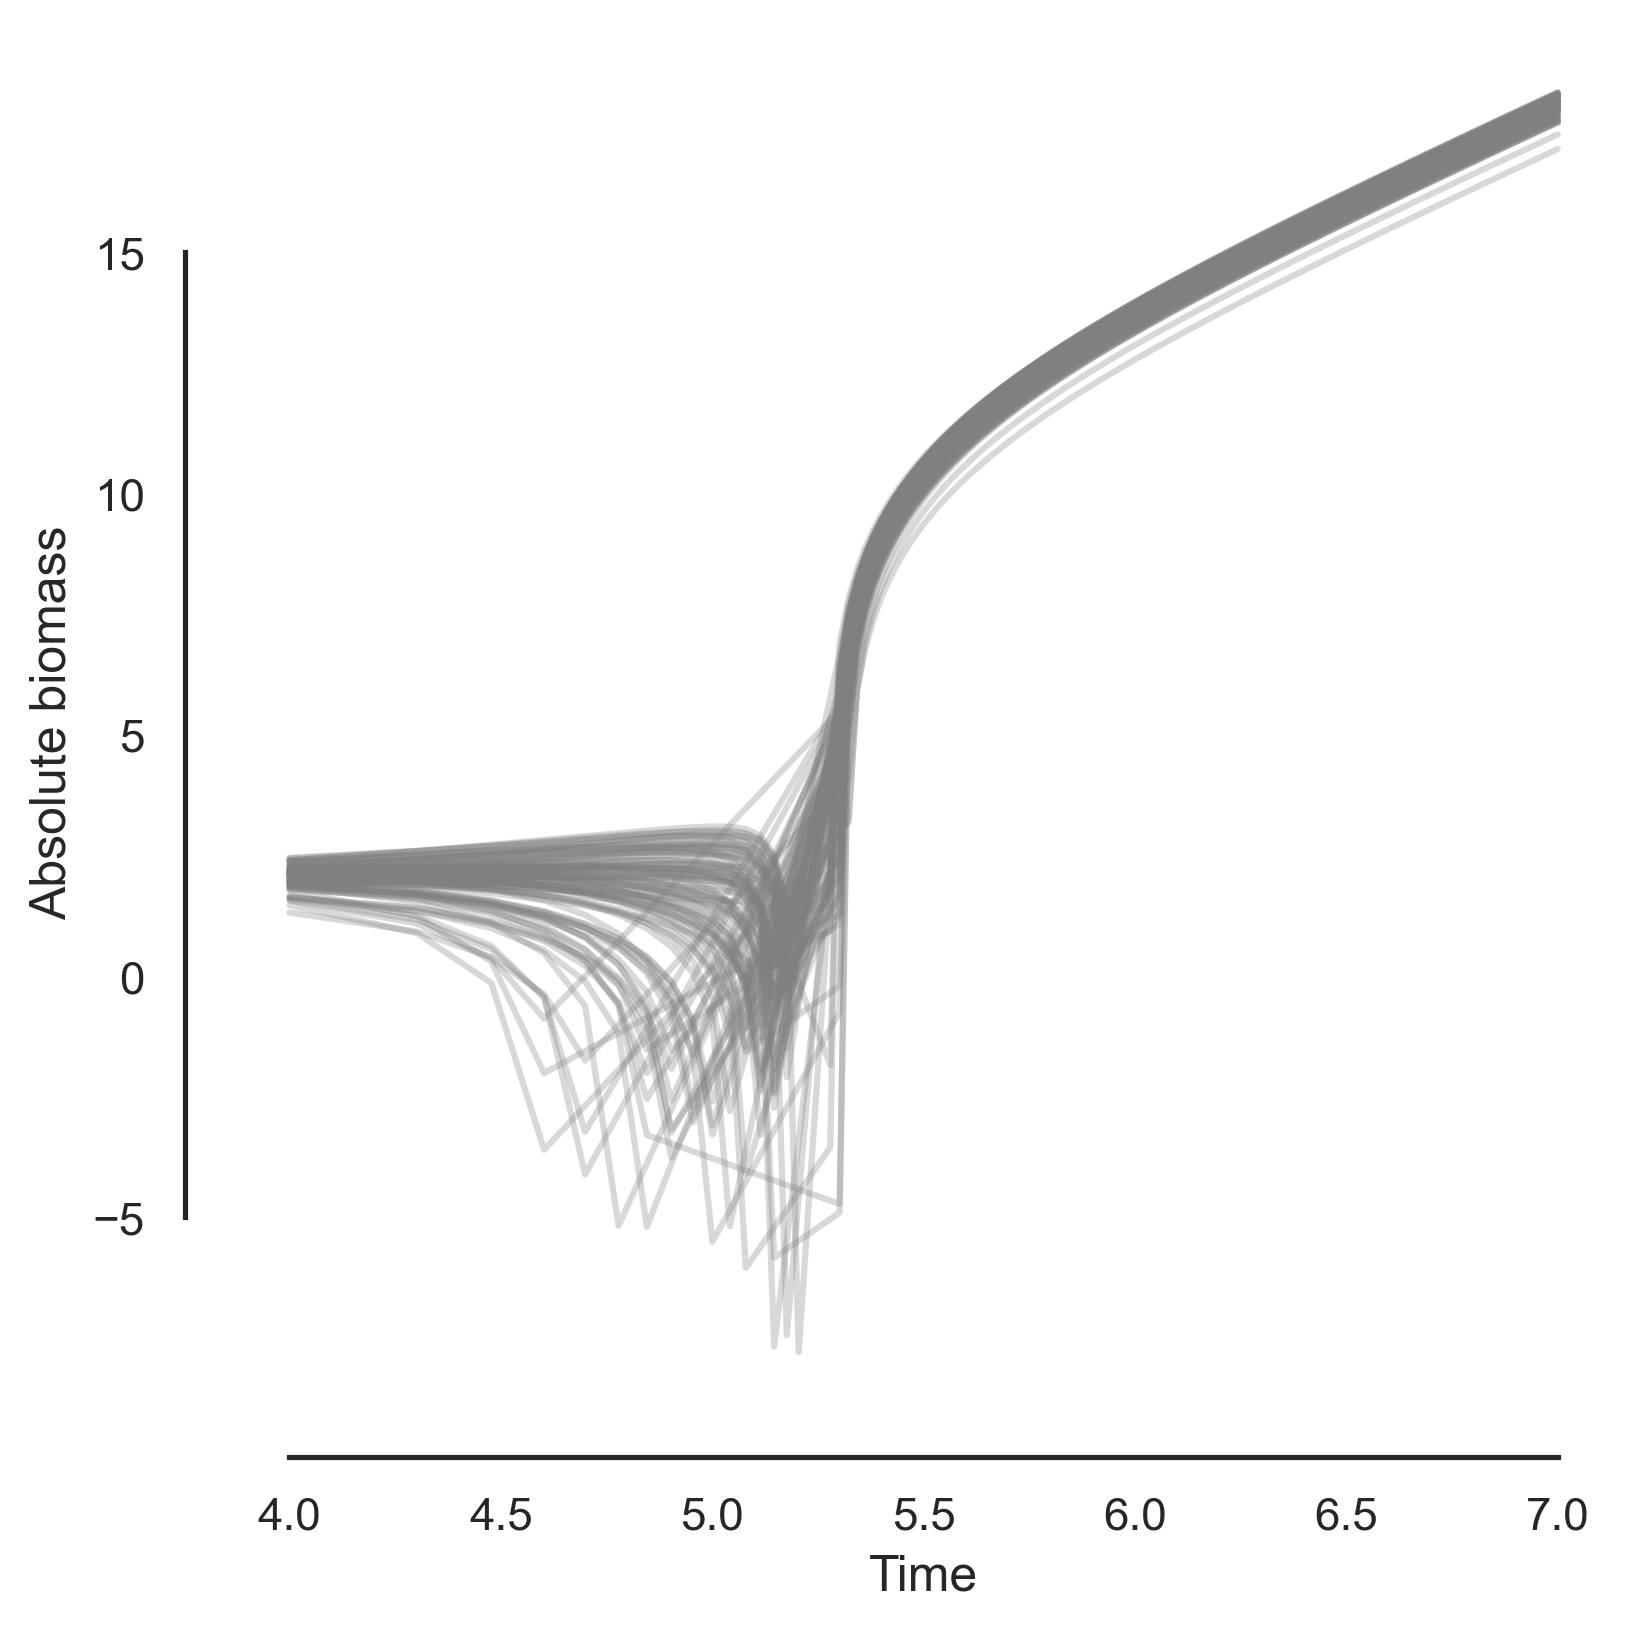

In [20]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Ct[i, :]), color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Absolute biomass')
sns.despine(offset=10, trim=True)

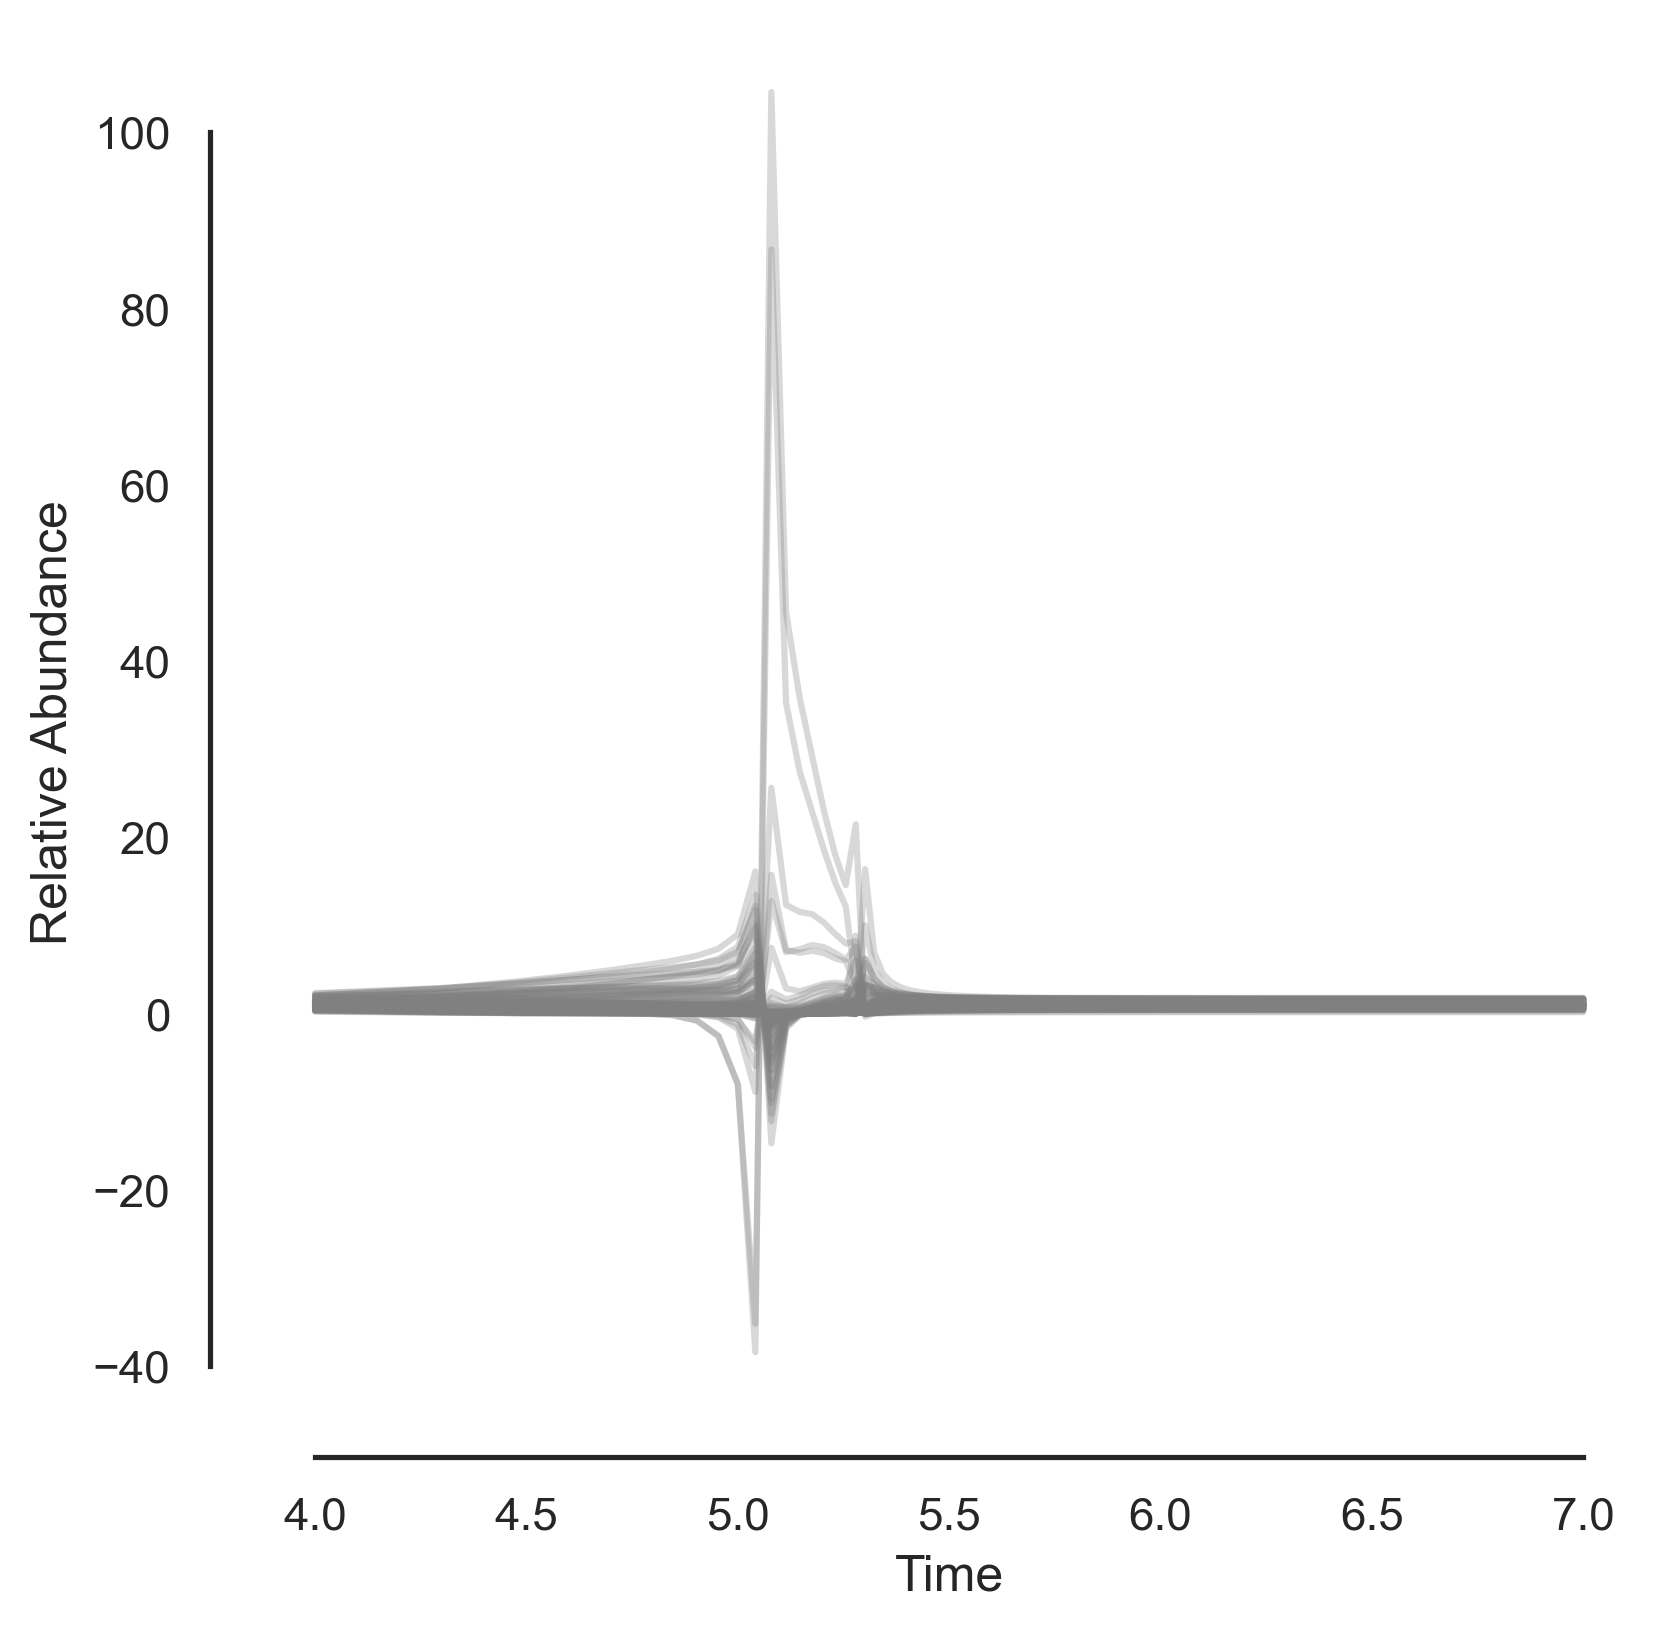

In [21]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100, color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Relative Abundance')
sns.despine(offset=10, trim=True)